<a href="https://colab.research.google.com/github/tuhinbiswas24/World-Wide-Unicorn-Startups-Data-Analysis/blob/main/World_Wide_Unicorn_Startups_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('World_Wide_Unicorn_Startups.csv')

In [3]:
df.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    956 non-null    object 
 1   Valuation  956 non-null    float64
 2   Date       956 non-null    object 
 3   Country    956 non-null    object 
 4   City       940 non-null    object 
 5   Industry   956 non-null    object 
 6   Investors  956 non-null    object 
 7   year       956 non-null    int64  
 8   month      956 non-null    int64  
 9   day        956 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 74.8+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

,Valuation,year,month,day
count,940.000000,940.000000,940.000000,940.000000
mean,3.261872,2019.546809,15.730851,6.782979
std,7.421253,2.024593,8.635126,3.261374
min,1.000000,2007.000000,1.000000,1.000000
25%,1.100000,2018.000000,8.000000,4.000000
50%,1.665000,2021.000000,16.000000,7.000000
75%,3.000000,2021.000000,23.000000,10.000000
max,140.000000,2021.000000,31.000000,12.000000


# **Correcting duplicate values because of spelling errors**

In [7]:
df.Industry.value_counts()
df["Industry"]=df["Industry"].apply(lambda x: "Fintech" if x=="Finttech" else x)
df["Industry"]=df["Industry"].apply(lambda x: "Artificial Intelligence" if x=="Artificial intelligence" else x)

Text(0.5, 1.0, 'Industry with Most to Least Startups')

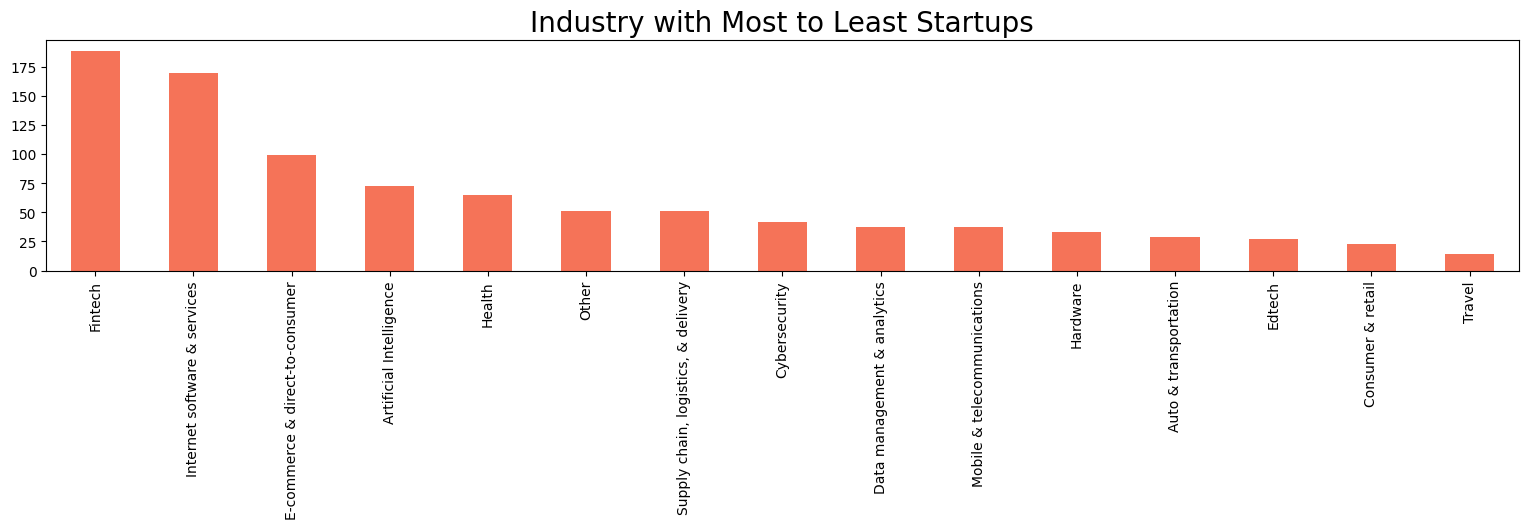

In [8]:
df.Industry.value_counts().plot(kind="bar",figsize=(19,3),color = '#F57358')
plt.title("Industry with Most to Least Startups", fontdict={"fontsize":20})

In [9]:
df.Country.value_counts().head(10)
top_10_country=df.Country.value_counts().head(10)

In [10]:
top_10_country=pd.DataFrame(top_10_country)

In [11]:
top_10_country.columns

Index(['Country'], dtype='object')

In [12]:
top_10_country=top_10_country.reset_index()
top_10_country.rename(columns={"index":"Country","Country":"No of Startups"},inplace=True)

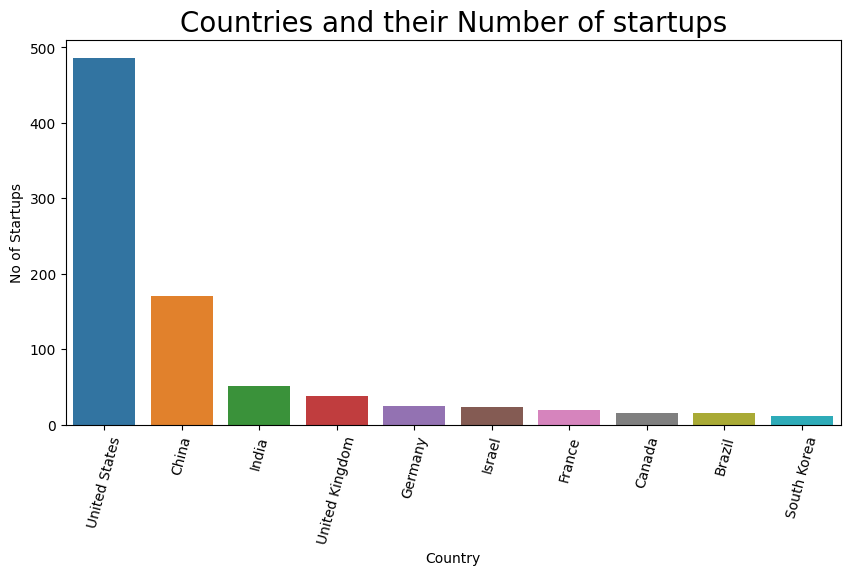

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x="Country",y="No of Startups", data=top_10_country,)
plt.title("Countries and their Number of startups", fontdict={"fontsize":20})
plt.xticks(rotation=75)
plt.show()

In [14]:
df.Valuation.value_counts().head(10)

1.0    216
2.0     84
1.5     42
1.2     37
3.0     36
1.1     28
1.4     23
4.0     20
1.6     17
1.7     15
Name: Valuation, dtype: int64

# **Top 3 countries with most number of startups analysis**

In [19]:
aTemp=top_10_country["Country"].head(3)
aTemp=list(aTemp)
aTemp

['United States', 'China', 'India']